In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import os, sys, email, re, string
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
lemmatiser = WordNetLemmatizer()

In [ ]:
def clean(text):
    # Function that get string and return it after cleaning as pure terms
    stop = set(STOPWORDS)
    # Excludes irrelevant words 
    stop.update(('fwd','RE','FW','Hello','Meeting','Ga','Access','positions','list','forward','floor','collar','fixed',
    'enron','hou','ect','corp','please','vince','time','mail','john','kay','day','message','week','kaminski','year',
    'meeting','enronxgate','question','group','work','call','scott','change','company','let','mann','date','number',
    'mark','today','david','mike','issue','houston','chris','subject','way','bass','jeff','edu','office','doc','don',
    'month','copy','name','comment','email','need','phone','point','thing','request','look','ben','michael','list',
    'help','delainey','fax','morning','use','tomorrow','thank','phillip','hotmail','guy','robert','night','lon',
    'part','talk','kate','home','mailto','person','address','form','jeffrey','something','end','line','hour',
    'place','march','love','anything','paul','giron','smith','hope','darron','jim','kevin','weekend','george',
    'north','someone','section','richard','discus','bob','jacoby','ena','room','see','demand','desk','area',
    'everyone','greg','detail','jason','afternoon','discussion','tom','kslaw','check','basis','visit','mcconnell',
    'miller','entity','location','peter','monday','response','show','page','jennifer','lot','meet','respond',
    'yesterday','pdx','house','june','larry','jan','dan','city','july','judy','friday','julie','shirley','meter',
    'level','fyi','addition','martin','anyone','generation','department','type','rick','friend','period','word',
    'lisa','think','class','johnson','org','robin','thompson','columbiagas','didn','april','william','lee','thomas',
    'hey','adam','stephen','man','sender','tim','taylor','organization','center','everything','ferc','notice',
    'start','davis','york','sorry','cell','return','street','hernandez','thursday','campbell','care','content',
    'curve','minute','floor','stinson','janet','head','move','kind','kent','tuesday','sheila','send','suzanne',
    'brenda','kim','matter','fgt','carolyn','cindy','ccampbell','tell','fwd','crenshaw','baumbach','linda','side',
    'clark','mind','hain','wharton','future','errol','carlos','hand','matt','bruce','gossett','brian','try',
    'wednesday','calendar','laura','nothing','doug','llc','rebecca','rob','stephanie','austin','victor','join',
    'joseph','couple', 'allen', 'kean', 'arnold', 'var', 'keith', 'lucy', 'grigsby'))
    # Punctuation (formerly sometimes called pointing) is the use of spacing, conventional signs, 
    # and certain typographical devices as aids to the understanding and the correct reading, both silently and aloud, 
    # of handwritten and printed texts. 
    exclude = set(string.punctuation) 
    # Lemmatize the terms
    lemma = WordNetLemmatizer()
    # The method rstrip() returns a copy of the string in 
    # which all chars have been stripped from the end of the string (default whitespace characters).
    text=text.rstrip()
    # Remaind only with letters without anything else
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Removing stopwords, digits and word lenth less than 3
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()) and len(i)>2)])
    # Exclude punctuation
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    # Adds the terms after running Lemmatizer
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    # Building tokens from the words to remain only the common nouns as terms
    tokens = nltk.word_tokenize(normalized)
    tags = nltk.pos_tag(tokens)
    nouns =" ".join(word for word,pos in tags if (pos == 'NN' and word not in stop and len(word)>2))
    return nouns

In [ ]:
def word_count(str):
    # Function that get string and counts each word in the string 
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        elif(len(word)>2):
            counts[word] = 1

    return counts

In [ ]:
def get_text_from_email(msg):
    # Function that gets email and return the content as list of strings
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload().lower() )
    return ''.join(parts)

In [ ]:
inputrows = 510000

# Load the CSV 
# emails_df = pd.read_csv("../input/emails.csv" ,nrows=inputrows) 
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/BE/Sem 8/ML/IA-2/emails.csv'
emails_df = pd.read_csv(path)
emails_df.head()
# Transform the CSV to list of strings
messages = list(map(email.message_from_string, emails_df['message']))

keys = messages[0].keys()

print("Starting making the keys...")

# Define Keys as headers
for key in keys: emails_df[key] = [doc[key] for doc in messages]

text_clean=[]
subject_Clean=[]
emails=0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Starting making the keys...


Starting looping...
[('deal', 3431), ('gas', 1615), ('price', 1209), ('contract', 1127), ('market', 1078), ('power', 1023), ('information', 1005), ('business', 992), ('agreement', 911), ('america', 840), ('energy', 827), ('management', 786), ('problem', 775), ('book', 740), ('project', 723), ('regard', 721), ('system', 711), ('team', 711), ('service', 695), ('trade', 687), ('plan', 685), ('report', 670), ('review', 664), ('term', 663), ('risk', 659), ('rate', 638), ('schedule', 627), ('development', 627), ('option', 572), ('cost', 557), ('volume', 541), ('order', 533), ('game', 519), ('process', 509), ('product', 509), ('capacity', 507), ('file', 500), ('contact', 499), ('draft', 496), ('trading', 490), ('presentation', 488), ('germany', 478), ('letter', 470), ('bill', 468), ('sale', 454), ('case', 452), ('customer', 449), ('resource', 448), ('ticket', 445), ('position', 440), ('idea', 439), ('operation', 426), ('party', 425), ('job', 424), ('capital', 413), ('trip', 410), ('value', 39

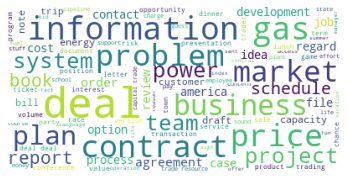

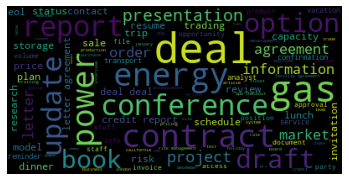

In [ ]:
# Load the emails content to list of strings
emails_df['content'] = list(map(get_text_from_email, messages)) # Refer to content

print("Starting looping...")

for i in range(1,inputrows):
    # Building two lists of strings from the emails contents and subjects, only from the sent items
    if(emails_df['X-Folder'][i] and "sent" in emails_df['X-Folder'][i]): 
        text_clean.append(clean(emails_df['content'][i].split("to: ")[0]))
        subject_Clean.append(clean(emails_df['Subject'][i]))
        emails+=1
        
text_clean = re.sub(r'[^a-zA-Z]', ' ', str(text_clean))
subject_Clean = re.sub(r'[^a-zA-Z]', ' ', str(subject_Clean))
    
print(Counter(word_count(str(text_clean))).most_common(100))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("In Subjects")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - -")
print(Counter(word_count(str(subject_Clean))).most_common(100))
print("Total emails = ",emails)

wordcloud = WordCloud(
    max_font_size=50,
    background_color='white',
    max_words=100
    ).generate(str(text_clean))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("Body")

wordcloud = WordCloud(
    max_font_size=50,
    max_words=100
    ).generate(str(subject_Clean))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("Subjects")